
# Machine Learning Internship task

Welcome folks, Thank you for applying for this internship and we are super excited to take this conversation ahead with you.

But before we go ahead, we would like you to go thru a small assessment, which will help us to evaluate you better on technical skills and working styles.


## Task Objective :
* [ ] Perform EDA on the given [data](https://github.com/geniusai-research/interns_task/blob/main/taskdata.csv).
* [ ] Build some new features which makes sense for the learning objective.
* [ ] Train any classifier (can be any model of your choice XGB,DNNs, etc) 
* [ ] Implement SHAP on this model to explain the decisions. (`Bonus points`) 
* [ ] Submit the task by creating a PR request on this [repository](https://github.com/geniusai-research/interns_task/).

## Instructions :
* Perform all the tasks mentioned above.
* Maintain a single **JupyterNotebook** which has all the descriptions and code in it. 
* Notebook needs to be properly structured .
* Code needs to reproducible.

**We will only accept the assignment if its in a single Notebook or else it will be rejected.**

## Important dates
The assignments needs to be completed in 1 week from today. <br>
**Deadline : 28th October**


If you have any issue then feel free to create issue on this [repository](https://github.com/geniusai-research/interns_task/) or reachout to us over the internshala chat.

<hr>

Cheers!!!  <br>
RK 


## 1. Import Necessary Libraries

- **We use Numpy to perform mathematical operations.**
- **Pandas for data analysis and manipulation.**
- **matplotlib and seaborn libraries for EDA and Visualizations.**

In [1]:
#Core Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Data Loading 

**We read the taskdata.csv file using Pandas and assign it as a Pandas Dataframe**

In [2]:
task=pd.read_csv('taskdata.csv')

In [3]:
task.head(10)

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.00,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.00,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.00,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.00,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.50,48.230769,1.692308,17.461538,25.769231,0.230769,0
5,412391,113.0,1,1.000000,14,0.0,0.0,12.692308,380.769231,0,350.00,799.153846,115.153846,166.307692,160.769231,0.153846,0
6,412662,1005.0,21,4.636364,11,0.0,0.0,1.000000,26.363636,0,0.00,119.727273,12.454545,46.000000,57.272727,0.181818,0
7,457000,262.0,29,3.250000,16,0.0,0.0,3.250000,68.750000,3,63.07,26.937500,3.250000,18.625000,17.062500,0.062500,0
8,490356,1005.0,3,1.400000,5,0.0,0.0,0.000000,0.000000,5,0.00,2.500000,0.500000,1.000000,1.750000,0.000000,1
9,491551,1017.0,1,1.000000,2,0.0,0.0,0.000000,0.000000,0,0.00,74.500000,10.500000,4.500000,9.500000,0.000000,1


In [4]:
task.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4407 non-null   int64  
 1   account_id             4400 non-null   float64
 2   max_return_days        4407 non-null   int64  
 3   average_return_days    4407 non-null   float64
 4   customer_since_months  4407 non-null   int64  
 5   total_revenue          4407 non-null   float64
 6   average_revenue        4407 non-null   float64
 7   avg_vas_count          4407 non-null   float64
 8   avg_used_vas_value     4407 non-null   float64
 9   business_type          4407 non-null   int64  
 10  avg_wallet_bonus       4407 non-null   float64
 11  avg_active_ads         4407 non-null   float64
 12  avg_new_ads            4407 non-null   float64
 13  avg_email_replies      4407 non-null   float64
 14  avg_call_replies       4407 non-null   float64
 15  avg_

In [5]:
task.shape

(4407, 17)

In [6]:
task.describe()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
count,4.407000e+03,4400.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000
mean,4.106655e+09,506.553864,22.335602,7.171576,9.874064,194.130365,16.942615,3.249388,72.119006,0.497844,338.851046,98.922260,16.812003,25.681004,27.622151,0.162009,0.103245
std,6.794948e+09,326.072756,43.591246,19.209092,5.169639,1548.361547,128.268824,5.509869,117.019515,1.199725,831.746150,297.692950,68.045904,55.324218,61.069006,0.517693,0.304313
min,4.100390e+05,111.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.184510e+08,226.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.142857,2.727273,0.000000,0.000000,13.500000,2.500000,4.461538,4.384615,0.000000,0.000000
50%,7.296626e+08,493.000000,2.000000,1.076923,12.000000,0.000000,0.000000,2.000000,45.000000,0.000000,40.000000,40.000000,6.333333,12.266667,12.933333,0.000000,0.000000
75%,7.292936e+09,1005.000000,30.000000,5.666667,14.000000,0.000000,0.000000,4.333333,100.000000,0.000000,327.280000,101.291667,14.250000,28.000000,30.784615,0.153846,0.000000
max,7.356031e+10,1017.000000,354.000000,354.000000,24.000000,43957.172700,3852.727273,156.583333,3357.500000,5.000000,15606.500000,9183.866667,2606.000000,1716.400000,1743.266667,14.636364,1.000000


**Check if there are null values present in any feature columns of our data-set**

In [7]:
task.isnull().sum()

user_id                  0
account_id               7
max_return_days          0
average_return_days      0
customer_since_months    0
total_revenue            0
average_revenue          0
avg_vas_count            0
avg_used_vas_value       0
business_type            0
avg_wallet_bonus         0
avg_active_ads           0
avg_new_ads              0
avg_email_replies        0
avg_call_replies         0
avg_sms_replies          0
target                   0
dtype: int64

In [8]:
#Checking visible categorical features

In [9]:
print(task['business_type'].unique()) 
print(np.sort(task['customer_since_months'].unique()))
print(task['target'].unique())

[0 3 5 1 4 2]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24]
[0 1]


## 3. Exploratory Data Analysis

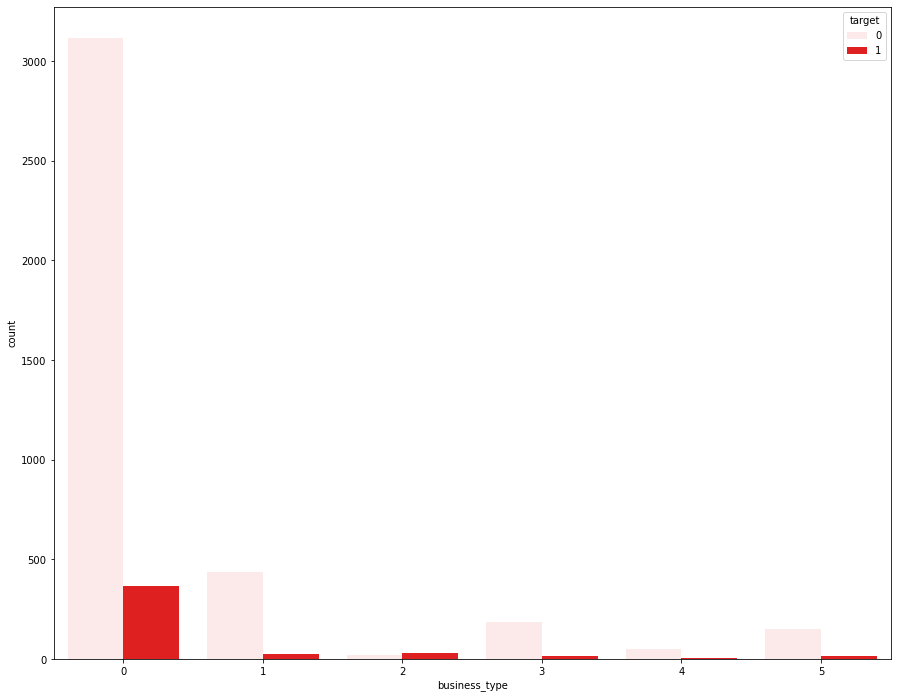

In [10]:
plt.figure(figsize=(15,12))
sns.countplot(task['business_type'],hue=task['target'],color='red')

In [11]:
# % of user who stays in each business
busi_size = task.groupby('business_type').size().to_frame('size')

busi_target=task.groupby('business_type').agg({'target':'sum'})
busi_size['target_1_count']=busi_target['target']

def fill(x):
    sz=x[0]
    tr=x[1]
    return (tr/sz)*100
busi_size['users_stay(%)']=busi_size[['size','target_1_count']].apply(fill,axis=1)
busi_size.reset_index(inplace=True)

busi_size['users_leave(%)']=100-busi_size['users_stay(%)']
busi_size.head(10)


,business_type,size,target_1_count,users_stay(%),users_leave(%)
0,0,3482,364,10.453762,89.546238
1,1,458,24,5.240175,94.759825
2,2,49,29,59.183673,40.816327
3,3,199,16,8.040201,91.959799
4,4,54,5,9.259259,90.740741
5,5,165,17,10.303030,89.696970


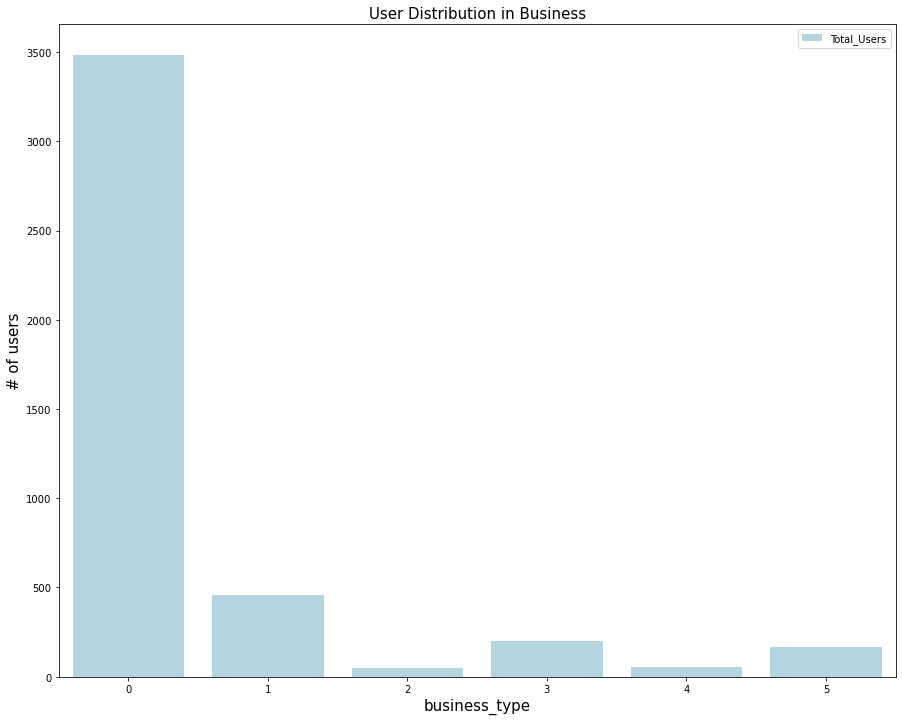

In [12]:
plt.figure(figsize=(15,12))

sns.barplot(x='business_type',y='size',data=busi_size,label='Total_Users',color="lightblue")
plt.xlabel('business_type',size=15)
plt.ylabel('# of users',size=15)
plt.title('User Distribution in Business',size=15)
plt.legend()

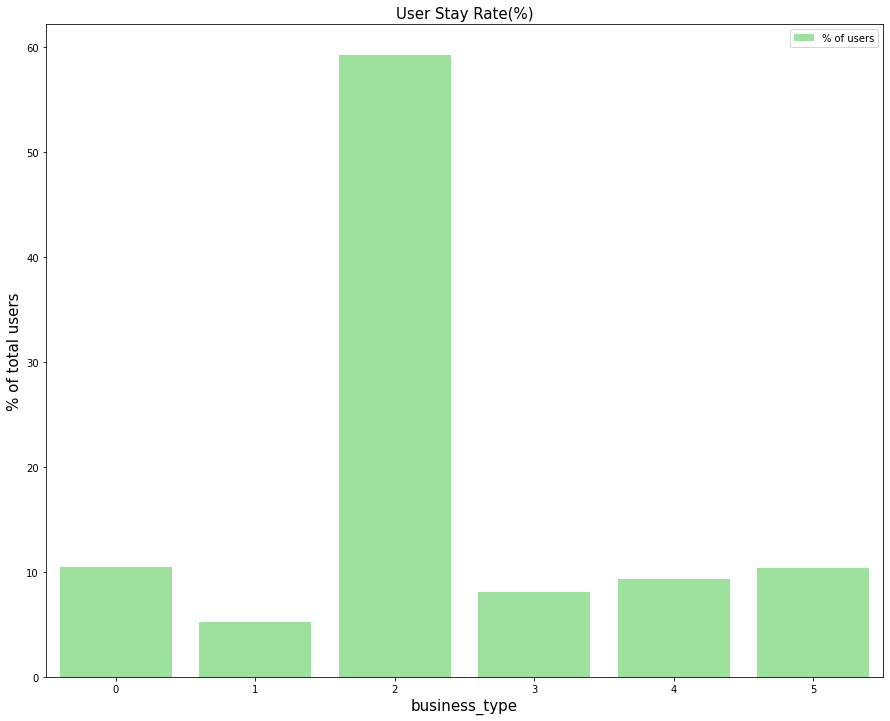

In [13]:
plt.figure(figsize=(15,12))

sns.barplot(x='business_type',y='users_stay(%)',data=busi_size,label='% of users',color="lightgreen")
plt.xlabel('business_type',size=15)
plt.ylabel('% of total users',size=15)
plt.title('User Stay Rate(%)',size=15)
plt.legend()

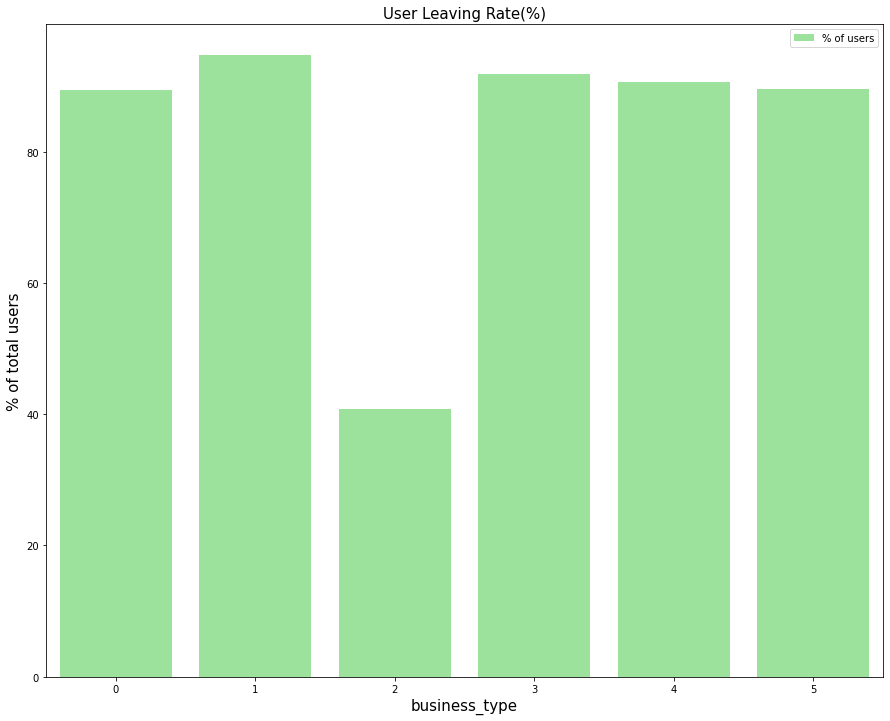

In [14]:
plt.figure(figsize=(15,12))

sns.barplot(x='business_type',y='users_leave(%)',data=busi_size,label='% of users',color="lightgreen")
plt.xlabel('business_type',size=15)
plt.ylabel('% of total users',size=15)
plt.title('User Leaving Rate(%)',size=15)
plt.legend()

- **Business 1 customers have the highest frequency of leaving**
- **Business 2 customers have a staying tendency**

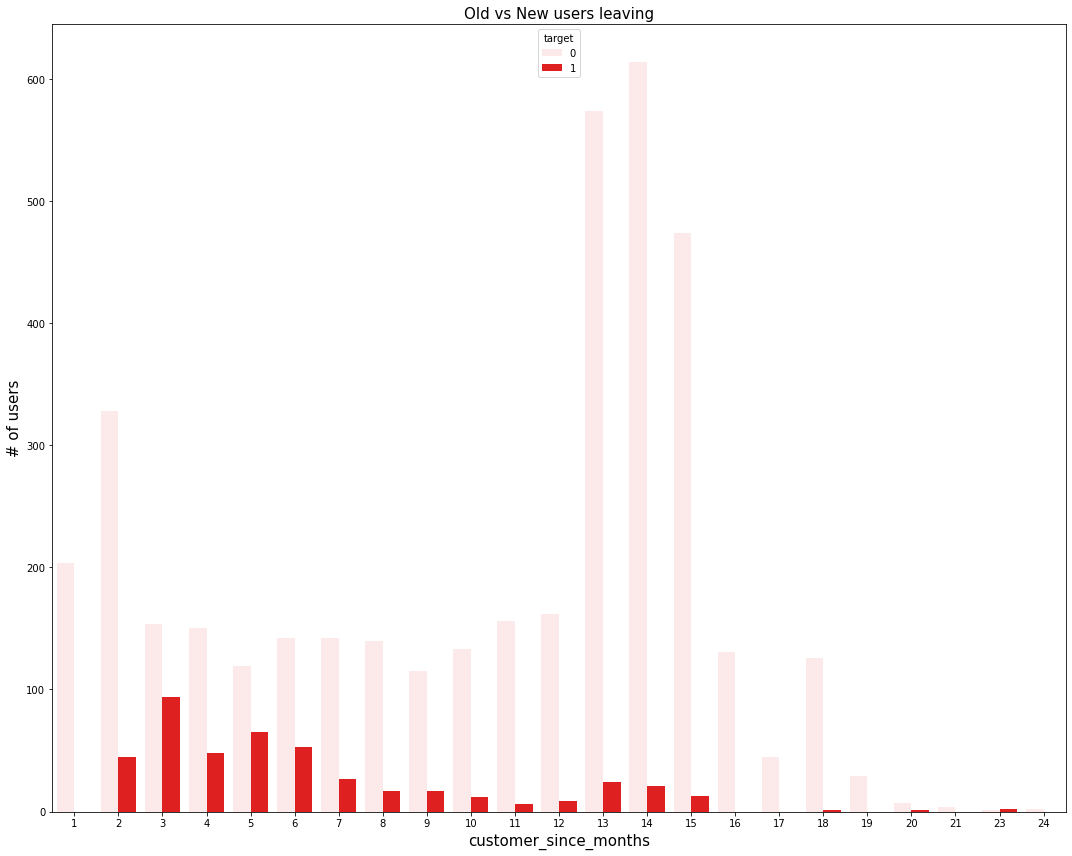

In [15]:
plt.figure(figsize=(15,12))
sns.countplot(task['customer_since_months'],hue=task['target'],color='red')

plt.title('Old vs New users leaving', size=15)
plt.xlabel('customer_since_months', size=15)
plt.ylabel('# of users', size=15)
plt.tight_layout()
plt.show()

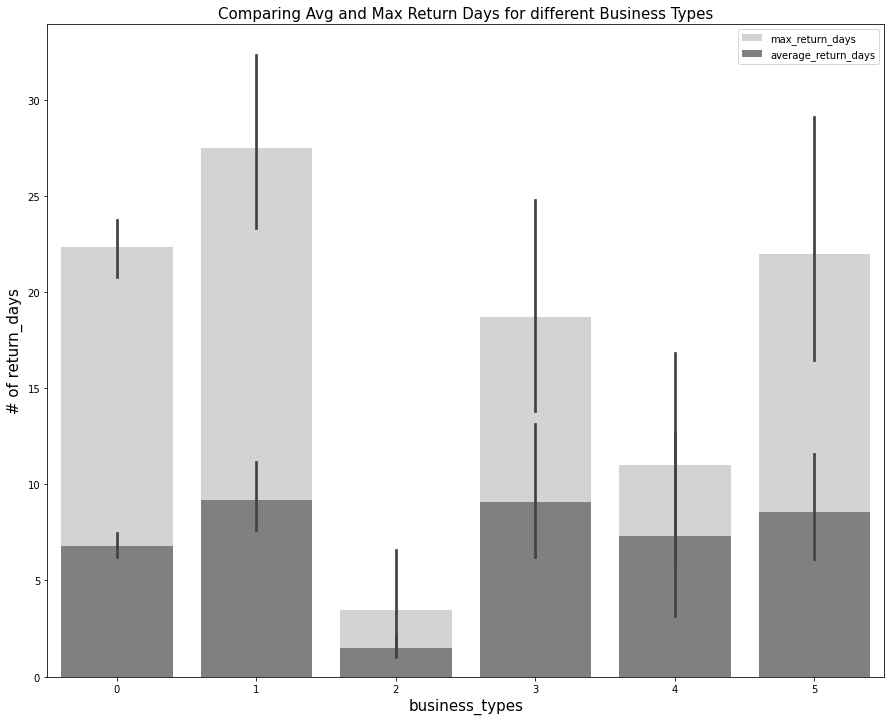

In [16]:
fig, ax = plt.subplots(figsize=(15, 12))

sns.barplot(x='business_type',y='max_return_days',data=task,label='max_return_days',color="lightgray")
sns.barplot(x='business_type',y='average_return_days',data=task,label='average_return_days',color="grey")
plt.xlabel('business_types',size=15)
plt.ylabel('# of return_days',size=15)
plt.title('Comparing Avg and Max Return Days for different Business Types',size=15)
plt.legend()

- **The two values(max_return_days and average_return_days) seem to be correlated**
- **Customers in business 0 make the quickest repurchase**
- **Business 1 customers take the longest to repurchase**

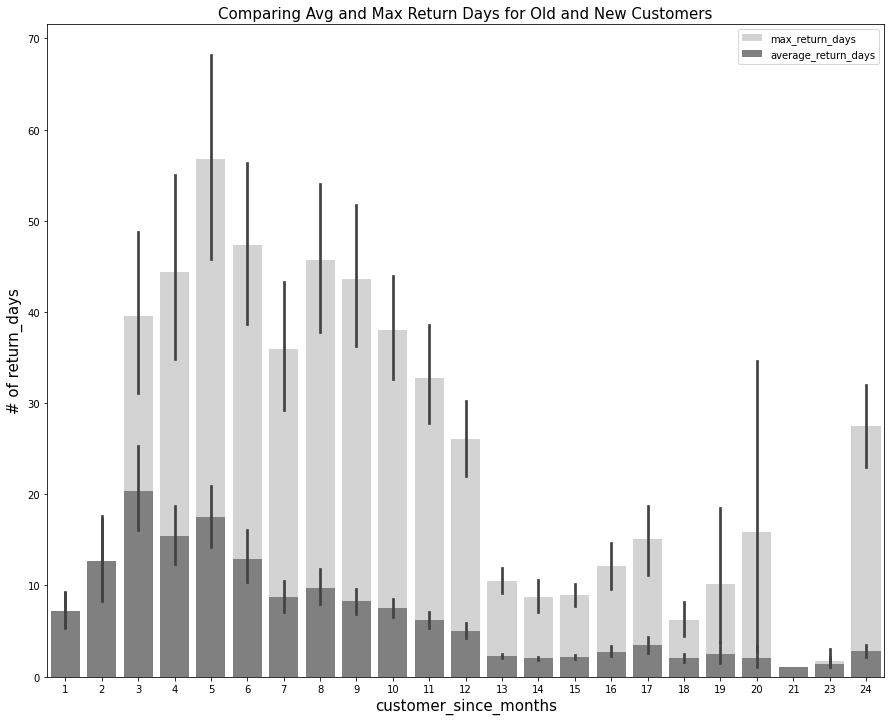

In [17]:
fig, ax = plt.subplots(figsize=(15, 12))

sns.barplot(x='customer_since_months',y='max_return_days',data=task,label='max_return_days',color="lightgray")
sns.barplot(x='customer_since_months',y='average_return_days',data=task,label='average_return_days',color="grey")
plt.xlabel('customer_since_months',size=15)
plt.ylabel('# of return_days',size=15)
plt.title('Comparing Avg and Max Return Days for Old and New Customers',size=15)
plt.legend()

**Older customers seems to make a quick repurchase on average**

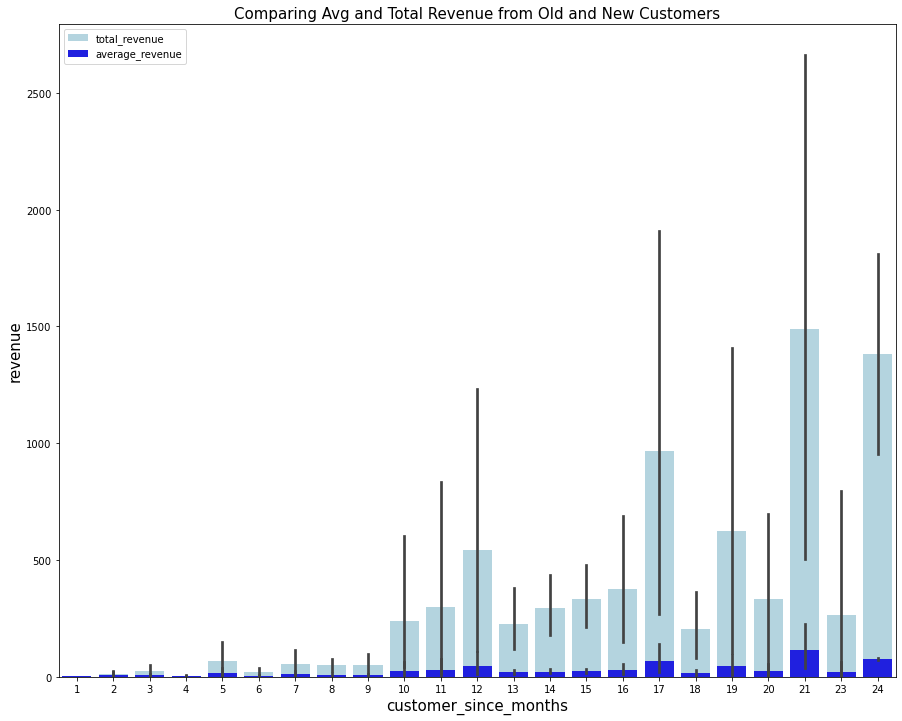

In [18]:
fig, ax = plt.subplots(figsize=(15, 12))

sns.barplot(x='customer_since_months',y='total_revenue',data=task,label='total_revenue',color="lightblue")
sns.barplot(x='customer_since_months',y='average_revenue',data=task,label='average_revenue',color="blue")
plt.xlabel('customer_since_months',size=15)
plt.ylabel('revenue',size=15)
plt.title('Comparing Avg and Total Revenue from Old and New Customers',size=15)
plt.legend()

**Total/Avg Revenue generated from old customers is greater than the new customers**

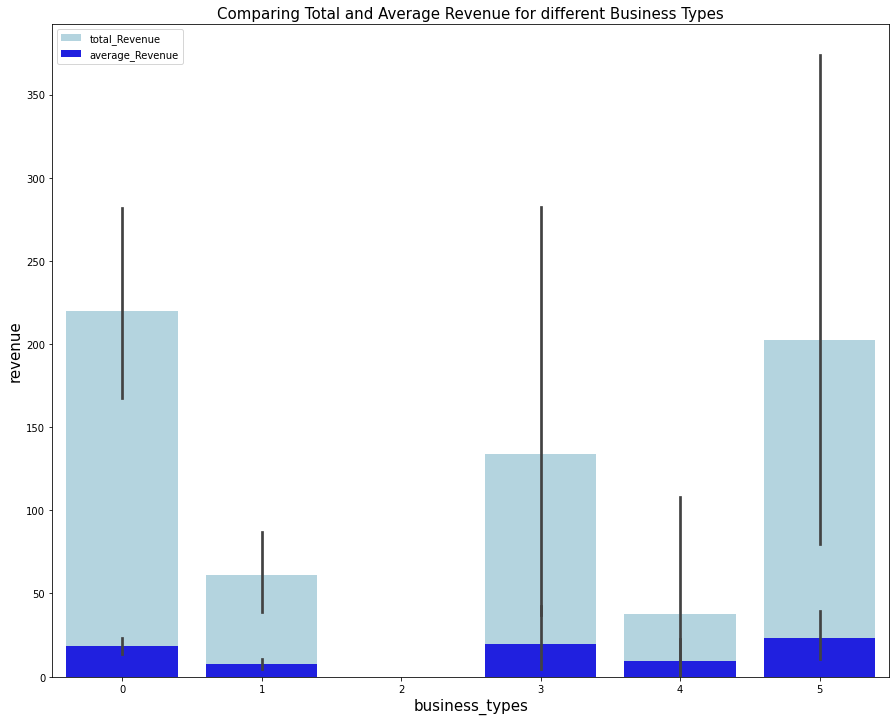

In [19]:
fig, ax = plt.subplots(figsize=(15, 12))

sns.barplot(x='business_type',y='total_revenue',data=task,label='total_Revenue',color="lightblue")
sns.barplot(x='business_type',y='average_revenue',data=task,label='average_Revenue',color="blue")
plt.xlabel('business_types',size=15)
plt.ylabel('revenue',size=15)
plt.title('Comparing Total and Average Revenue for different Business Types',size=15)
plt.legend()

- **Business 0 brings the most Total Revenue however the Average Revenue is the most for Business 5**
- **Business 2 brings 0 Revenue**

Text(0.5, 1.0, 'Average Call Replies-Users Staying(1) vs Leaving(0)')

<Figure size 1080x864 with 0 Axes>

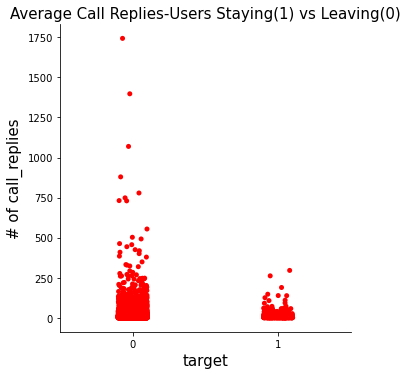

In [20]:
plt.figure(figsize=(15,12))

sns.catplot(x='target',y='avg_call_replies',data=task,color='red',legend=True)
plt.xlabel('target',size=15)
plt.ylabel('# of call_replies',size=15)
plt.title('Average Call Replies-Users Staying(1) vs Leaving(0)',size=15)


Text(0.5, 1.0, 'Average Call Replies-Users Staying(1) vs Leaving(0)')

<Figure size 1080x864 with 0 Axes>

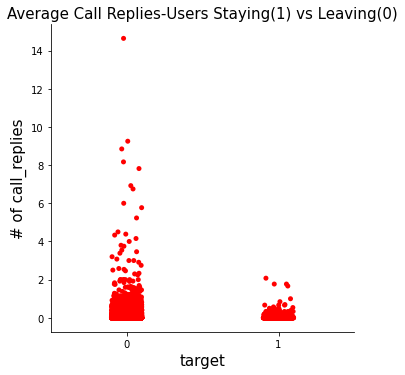

In [21]:
plt.figure(figsize=(15,12))

sns.catplot(x='target',y='avg_sms_replies',data=task,color='red',legend=True)
plt.xlabel('target',size=15)
plt.ylabel('# of call_replies',size=15)
plt.title('Average Call Replies-Users Staying(1) vs Leaving(0)',size=15)


Text(0.5, 1.0, 'Average Call Replies-Users Staying(1) vs Leaving(0)')

<Figure size 1080x864 with 0 Axes>

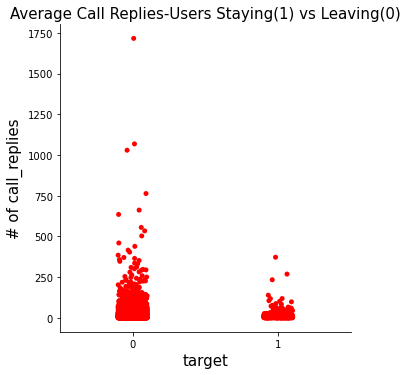

In [22]:
plt.figure(figsize=(15,12))

sns.catplot(x='target',y='avg_email_replies',data=task,color='red',legend=True)
plt.xlabel('target',size=15)
plt.ylabel('# of call_replies',size=15)
plt.title('Average Call Replies-Users Staying(1) vs Leaving(0)',size=15)


### Comparing Two Continuous Variables

Text(0.5, 1.0, 'Total Revenue vs Avg Active Ads')

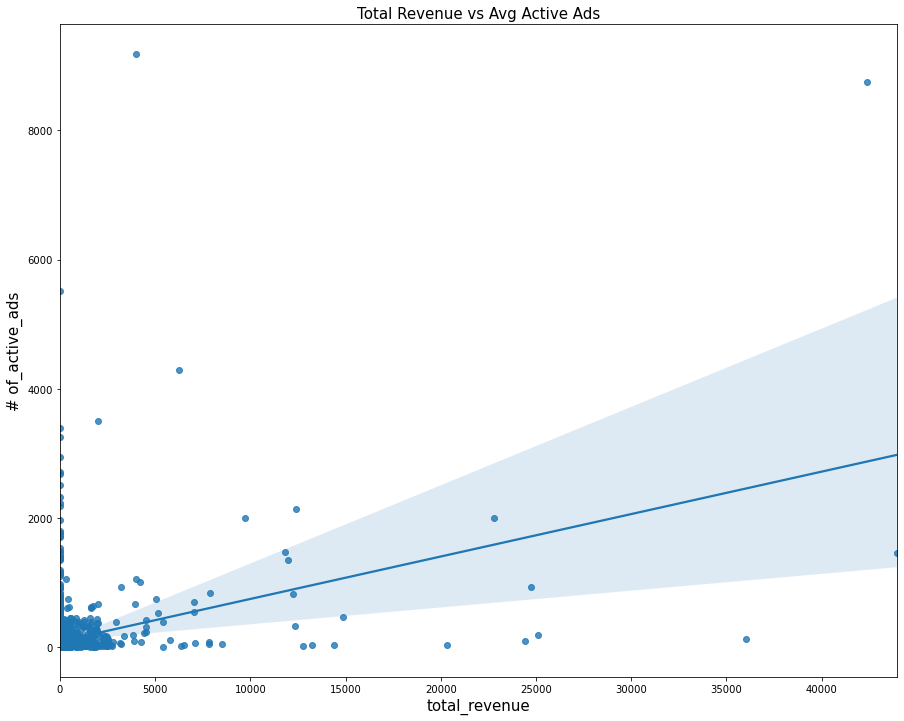

In [23]:
plt.figure(figsize=(15,12))
sns.regplot(x='total_revenue',y='avg_active_ads',data=task)
plt.xlabel('total_revenue',size=15)
plt.ylabel('# of_active_ads',size=15)
plt.title('Total Revenue vs Avg Active Ads',size=15)


Text(0.5, 1.0, 'Total Revenue vs Avg New Ads')

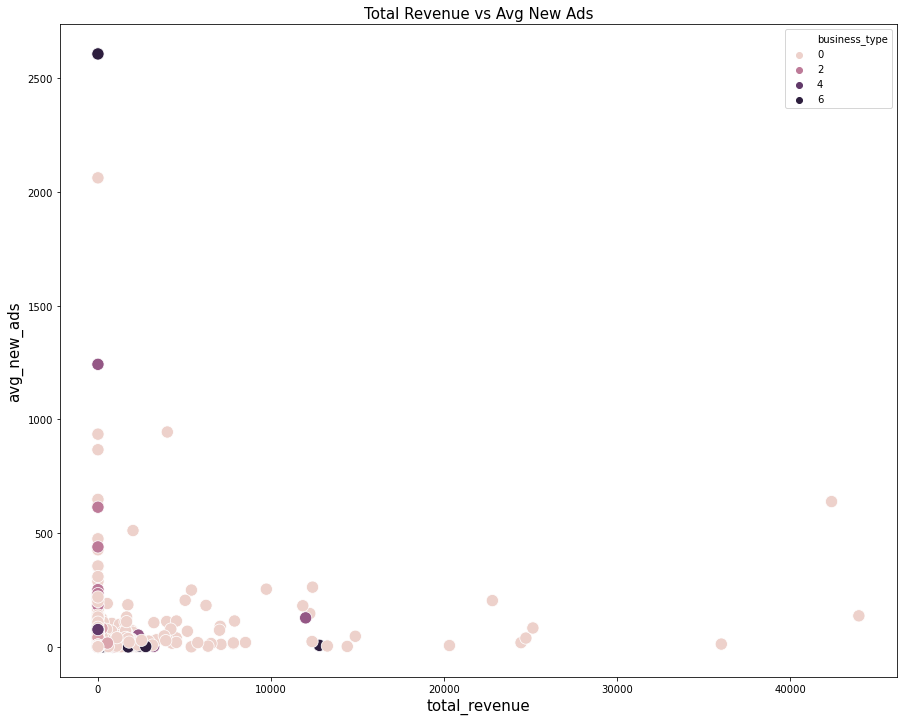

In [24]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='total_revenue',y='avg_new_ads',data=task,hue='business_type',s=150)
plt.xlabel('total_revenue',size=15)
plt.ylabel('avg_new_ads',size=15)
plt.title('Total Revenue vs Avg New Ads',size=15)


Text(0.5, 1.0, 'Average Revenue vs Average Email Replies')

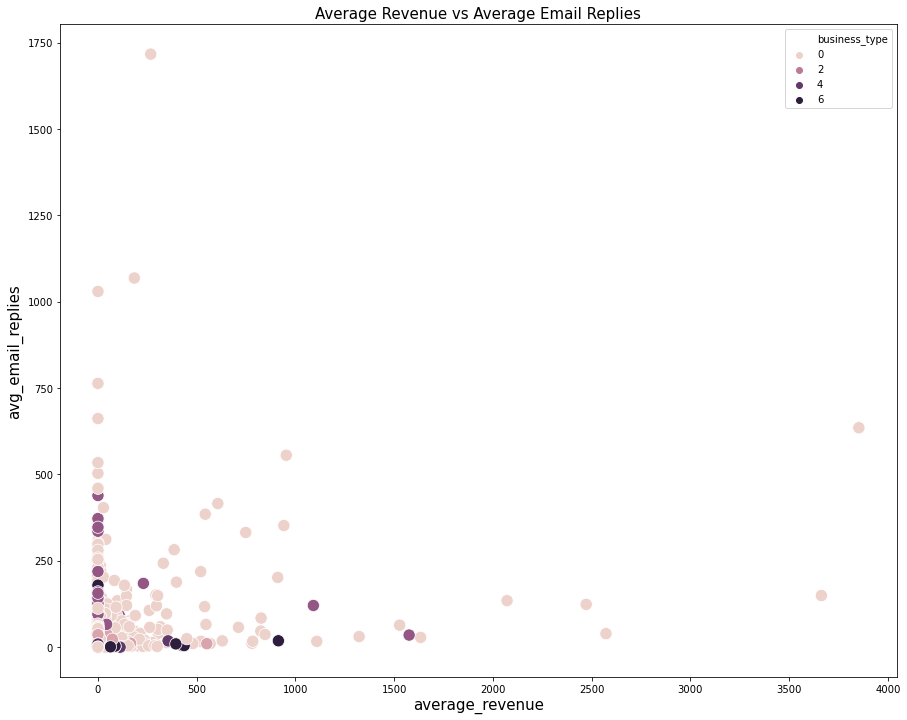

In [25]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='average_revenue',y='avg_email_replies',data=task,hue='business_type',s=150)
plt.xlabel('average_revenue',size=15)
plt.ylabel('avg_email_replies',size=15)
plt.title('Average Revenue vs Average Email Replies',size=15)


Text(0.5, 1.0, 'Average Revenue vs Average Call Replies')

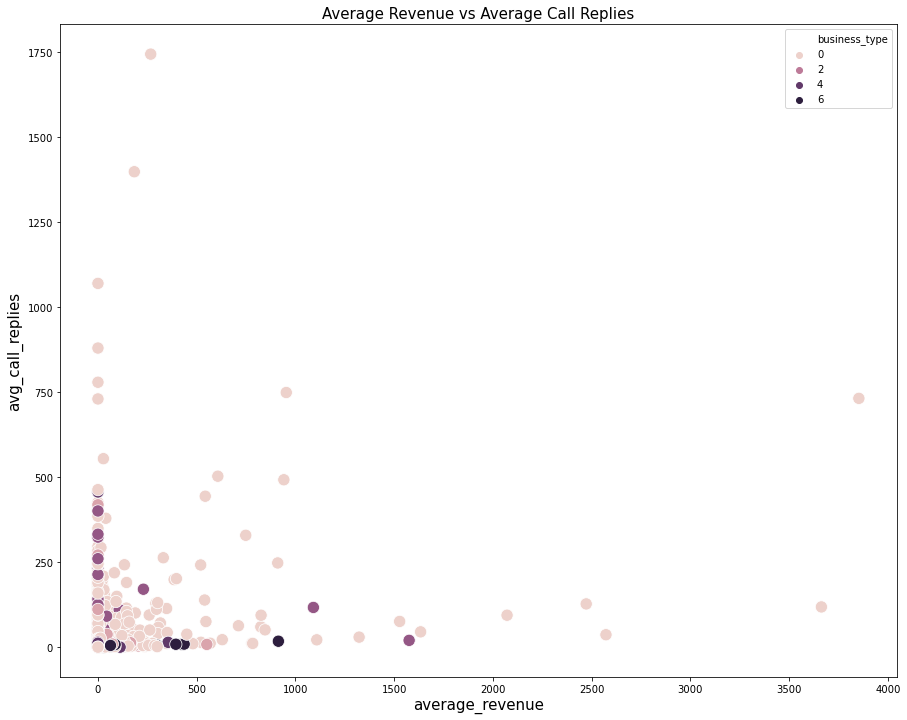

In [26]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='average_revenue',y='avg_call_replies',data=task,hue='business_type',s=150)
plt.xlabel('average_revenue',size=15)
plt.ylabel('avg_call_replies',size=15)
plt.title('Average Revenue vs Average Call Replies',size=15)

Text(0.5, 1.0, 'Average Revenue vs Average SMS Replies')

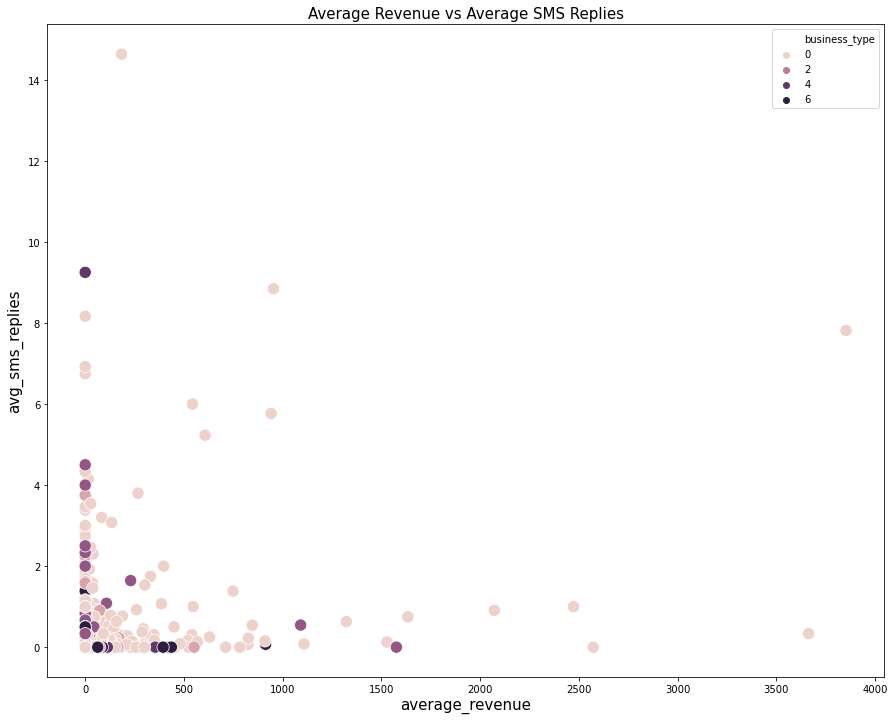

In [27]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='average_revenue',y='avg_sms_replies',data=task,hue='business_type',s=150)
plt.xlabel('average_revenue',size=15)
plt.ylabel('avg_sms_replies',size=15)
plt.title('Average Revenue vs Average SMS Replies',size=15)

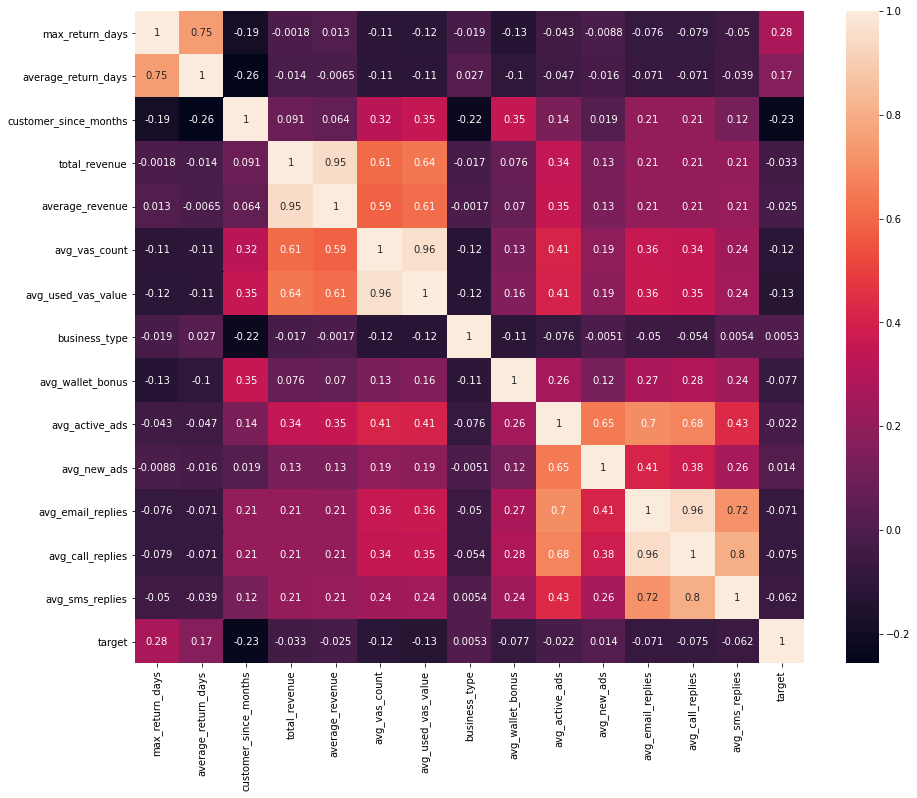

In [28]:
plt.figure(figsize=(15,12))
sns.heatmap(task.drop(columns=['user_id','account_id']).corr(),annot=True)

## 4. Feature Engineering

### Performing mean-encoding on the customer_since_months categorical feature column

In [29]:
task1=task.groupby('customer_since_months').agg({'target':'mean'}).reset_index()
#task1.head(25)

In [30]:
#task1[task1['customer_since_months']==23]['target'].iloc[0]

In [31]:
def mean_enc(x):
    return task1[task1['customer_since_months']==x]['target'].iloc[0]
task['customer_since_months']=task['customer_since_months'].apply(mean_enc)
#task.head()

### Performing one hot encoding and mapping the values of categorical column 'business_type' to 1 or 0

In [32]:
task=pd.get_dummies(task,columns=['business_type'],drop_first=True)
task.head(10)

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,avg_wallet_bonus,...,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target,business_type_1,business_type_2,business_type_3,business_type_4,business_type_5
0,410039,496.0,8,1.500000,0.033071,0.0,0.0,3.666667,66.666667,300.00,...,15.250000,32.416667,27.916667,0.250000,0,0,0,0,0,0
1,410240,499.0,37,8.200000,0.082759,0.0,0.0,4.900000,114.000000,0.00,...,18.300000,16.200000,13.800000,0.000000,0,0,0,0,0,0
2,411764,493.0,9,1.533333,0.026694,0.0,0.0,5.333333,106.666667,150.00,...,3.750000,20.250000,24.500000,0.000000,0,0,0,0,0,0
3,411985,262.0,1,1.000000,0.033071,0.0,0.0,6.307692,176.153846,1481.00,...,80.769231,87.461538,57.615385,0.000000,1,0,0,0,0,0
4,412071,496.0,1,1.000000,0.007874,0.0,0.0,5.846154,109.230769,41.50,...,1.692308,17.461538,25.769231,0.230769,0,0,0,0,0,0
5,412391,113.0,1,1.000000,0.033071,0.0,0.0,12.692308,380.769231,350.00,...,115.153846,166.307692,160.769231,0.153846,0,0,0,0,0,0
6,412662,1005.0,21,4.636364,0.037037,0.0,0.0,1.000000,26.363636,0.00,...,12.454545,46.000000,57.272727,0.181818,0,0,0,0,0,0
7,457000,262.0,29,3.250000,0.000000,0.0,0.0,3.250000,68.750000,63.07,...,3.250000,18.625000,17.062500,0.062500,0,0,0,1,0,0
8,490356,1005.0,3,1.400000,0.353261,0.0,0.0,0.000000,0.000000,0.00,...,0.500000,1.000000,1.750000,0.000000,1,0,0,0,0,1
9,491551,1017.0,1,1.000000,0.120643,0.0,0.0,0.000000,0.000000,0.00,...,10.500000,4.500000,9.500000,0.000000,1,0,0,0,0,0


### Getting the corr matrix for our dataset

In [33]:
task.drop(columns=['user_id','account_id']).corr()

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target,business_type_1,business_type_2,business_type_3,business_type_4,business_type_5
max_return_days,1.000000,0.749094,0.294287,-0.001811,0.013263,-0.112033,-0.118764,-0.131315,-0.042675,-0.008815,-0.075633,-0.079001,-0.050154,0.275005,0.040164,-0.045898,-0.018122,-0.028967,-0.001491
average_return_days,0.749094,1.000000,0.273791,-0.014424,-0.006545,-0.108025,-0.113959,-0.103527,-0.046713,-0.016387,-0.070537,-0.070755,-0.038732,0.165715,0.036119,-0.031277,0.021729,0.000940,0.014474
customer_since_months,0.294287,0.273791,1.000000,-0.065329,-0.045794,-0.217409,-0.237512,-0.206593,-0.092457,-0.013303,-0.132274,-0.134935,-0.087136,0.372411,0.089491,0.128498,0.065936,0.044990,0.055737
total_revenue,-0.001811,-0.014424,-0.065329,1.000000,0.950358,0.608588,0.642122,0.075943,0.341777,0.130780,0.214070,0.214298,0.213396,-0.032571,-0.029311,-0.013296,-0.008494,-0.011265,0.001048
average_revenue,0.013263,-0.006545,-0.045794,0.950358,1.000000,0.586251,0.612556,0.070069,0.354470,0.132430,0.209710,0.209277,0.214935,-0.025354,-0.025532,-0.014008,0.004301,-0.006749,0.009506
avg_vas_count,-0.112033,-0.108025,-0.217409,0.608588,0.586251,1.000000,0.962312,0.131268,0.413862,0.191781,0.360756,0.342740,0.240634,-0.117167,-0.123878,-0.055457,-0.059123,-0.028534,-0.047313
avg_used_vas_value,-0.118764,-0.113959,-0.237512,0.642122,0.612556,0.962312,1.000000,0.156331,0.407619,0.185732,0.363019,0.347185,0.244277,-0.128469,-0.138053,-0.058021,-0.062019,-0.025964,-0.041460
avg_wallet_bonus,-0.131315,-0.103527,-0.206593,0.075943,0.070069,0.131268,0.156331,1.000000,0.256563,0.121428,0.273858,0.284432,0.237789,-0.076814,-0.115474,-0.037513,-0.053538,-0.045381,-0.034340
avg_active_ads,-0.042675,-0.046713,-0.092457,0.341777,0.354470,0.413862,0.407619,0.256563,1.000000,0.650650,0.704178,0.677154,0.433438,-0.021957,-0.089051,0.014524,-0.025121,-0.028304,-0.041446
avg_new_ads,-0.008815,-0.016387,-0.013303,0.130780,0.132430,0.191781,0.185732,0.121428,0.650650,1.000000,0.413364,0.378593,0.260827,0.014184,-0.047301,0.069917,-0.008074,-0.018198,0.007070


**we can drop either of avg_email/avg_call,total_revenue/avg_revenue,avg_vas_count/avg_used_vas_value**

In [34]:
X=task.drop(columns=['account_id','user_id','avg_email_replies','total_revenue','avg_used_vas_value','target'])

In [35]:
y=task['target']

## 5. Train-Test Split

**Split the data into a training set and a testing set**

In [36]:
np.random.seed(0)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 6. Train our Model

Now its time to train a XGBoost Classifier. 

**Call the XGBClassifier() model from sklearn and fit the model to the training data.**

In [38]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [39]:
classifier=XGBClassifier()

In [40]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## 7. Model Evaluation

**Now get predictions from the model and create a confusion matrix and a classification report.**

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
pred=classifier.predict(X_test)

In [43]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1295
           1       0.67      0.31      0.43       160

    accuracy                           0.91      1455
   macro avg       0.79      0.65      0.69      1455
weighted avg       0.89      0.91      0.89      1455



In [44]:
print(confusion_matrix(y_test,pred))

[[1270   25]
 [ 110   50]]


In [45]:
score=accuracy_score(y_test,pred)
print("Accuracy Score: {}".format(score))

Accuracy Score: 0.9072164948453608


In [46]:
# Tuning the parameters and comparing score
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)


In [47]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    4.9s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.9s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           num_pa...
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, sub

In [48]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [49]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
classifier2=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=np.nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
classifier2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
pred2=classifier2.predict(X_test)

In [53]:
accuracy_score(y_test,pred2)

0.9003436426116839

In [54]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier2,X,y,cv=10)

In [55]:
score

array([0.89795918, 0.9047619 , 0.91836735, 0.91609977, 0.90249433,
       0.90929705, 0.9138322 , 0.89545455, 0.89318182, 0.86136364])

In [56]:
score.mean()

0.901281179138322

## 7. Interpretation with SHAP

In [57]:
import shap

In [58]:
shap.initjs()
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(X_test)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

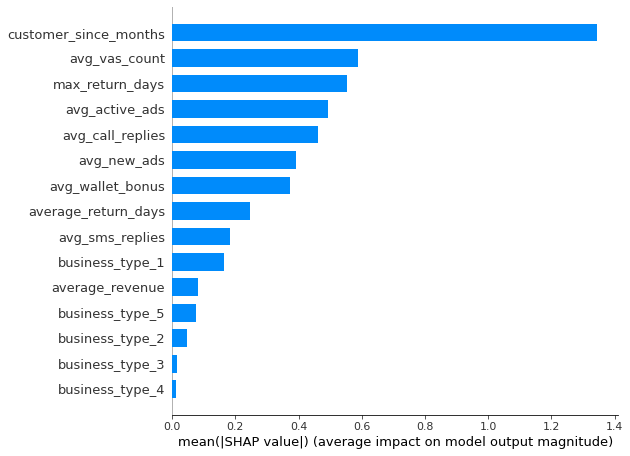

In [59]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


**In the above barplot,we are able to see which factors were mostly responsible for the predictions**

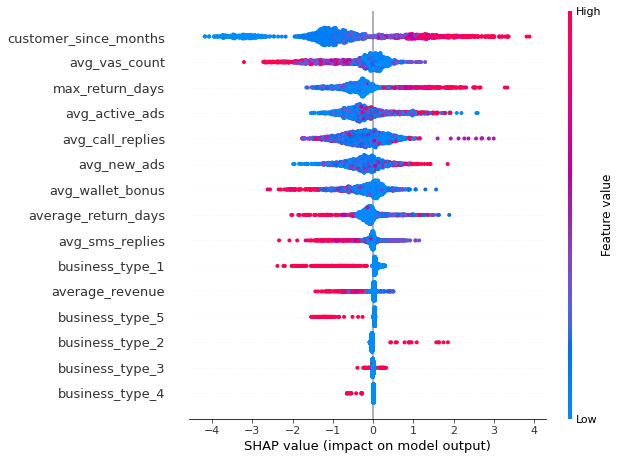

In [60]:
shap.summary_plot(shap_values, X_test)